In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../../data/ST001937_AN003150.csv')

Dropping not needed columns and renaming the Phenotypes column to labels

In [6]:

df = df.drop(['Sample ID', 'RAW_FILE_NAME'], axis=1)
df['Phenotypes'] = df['Phenotypes'].apply(lambda x: 0 if x == 'Healthy Controls' else 1 if x == 'Maligant SPNS' else 2)
df['Phenotypes'].unique()

array([2, 1, 0])

Filling missing values with the mean

In [7]:
df = df.fillna(df.mean())

Creating kmeans model and plotting the clusters

In [8]:
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Phenotypes', axis=1))

# Creating KMeans model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

/tmp/ipykernel_32803/3337090004.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Cluster'] = kmeans.fit_predict(df_scaled)


Plotting the clusters

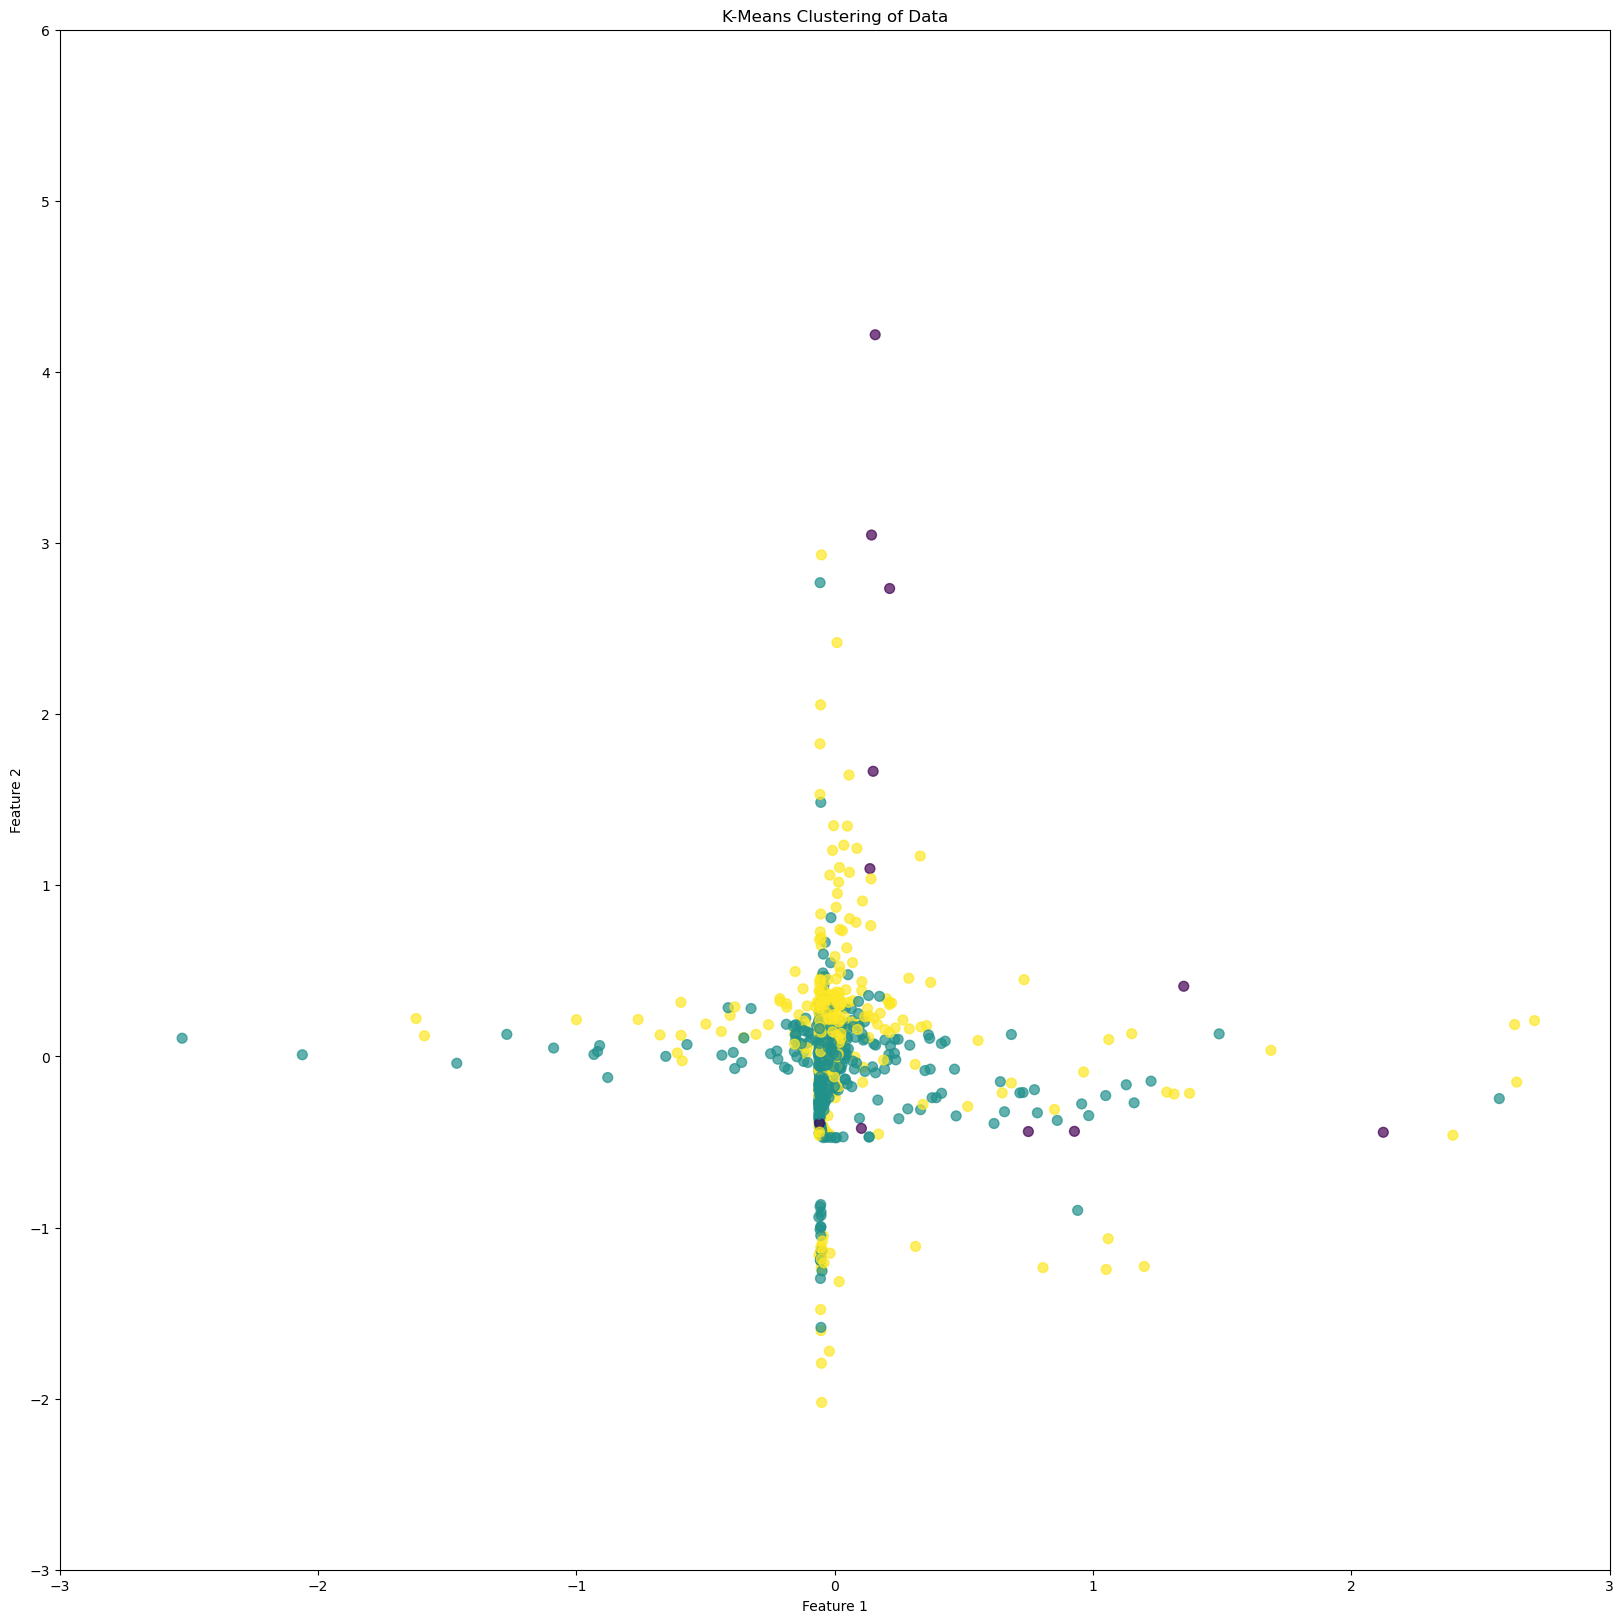

In [9]:
plt.figure(figsize=(20,20))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df['Cluster'], alpha=0.7, s=50)

plt.title('K-Means Clustering of Data')
plt.xlim(-3, 3)
plt.ylim(-3, 6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()